In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Mall customer data**

- it has four columns having CustomerID,Age,Income and Spending score

- Spending score between 1 to 100

- More spending score means more valuable customer

- Income and Spending score are the important variables

- Group the data based on Income and Spending score

In [2]:
mall_df=pd.read_csv('Mall_Customers.csv')
mall_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
mall_df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Select only income and spending score columns
# M-1 : select by using column names
# M-2 : select by using iloc
# M-3 : by droping unwanted columns
X=mall_df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Scatter Plots**

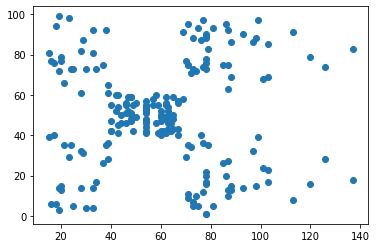

In [6]:
plt.scatter(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'])
plt.show()

$K-Means$

**WCSS**

- From above scatter we observed there might be 5 optimal clusters can be available

- in order to get optimal cluster we will use **elbow method**

- elbow method is a graph between cluster vs WCSS

- so first we will calculate wcss for one cluster i.e.k=1

- then we repeat the process for multiple clusters

- then we plot the graph

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/62725cluster0.png" alt="K Means Clustering: Method to get most optimal K value" class=" nofocus" tabindex="0" aria-label="K Means Clustering: Method to get most optimal K value" role="button">

In [7]:
# we need to decide the number of clusters
# Elbow method
# within cluster sum of square(WCSS)
# we randomly gives 10 clusters, for each 

## Elbow Method


- Sum of square between the clusters (SSB)

   - Variance in side the clusters
    
   - Variance in side the clusters should be max

- Sum of square with in the cluster (SSW) 

   - Variance between the clusters
    
   - Variance between the clusters should be low

   - Then only we can sure that clusters apart from each other
    
Example: 9000   5000   1000  900  850

**First we check for one cluster to understand within sum of square**

In [8]:
from sklearn.cluster import KMeans

In [9]:
### just applying one cluster
### Base model

In [10]:
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1

# n_clusters=no.of clusters to choose
# max_iter=the distance calculations
# random state = picking a random observation

KMeans(n_clusters=1, random_state=1234)

In [11]:
# select only annuval income and spending score
X=mall_df.iloc[:,[3,4]]

In [12]:
kmeans_1.fit(X)

KMeans(n_clusters=1, random_state=1234)

In [13]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=1234)
kmeans_1.fit(X)
# we are not intrested which data point
# belongs to which cluster
# bcz

KMeans(n_clusters=1, random_state=1234)

$Inertia$

- measures how well a dataset was clustered by K-Means

- it is calculated by measuring the distance between each data point and its centroid,squaring this distance

- and summing these squares across one cluster

- inertia also called as **Within cluster sum of squares(Wcss)**

- choose the clusters find the distance between each data point to the cluster centroid

- add all the distance is nothing but WCSS

In [14]:
kmeans_1.inertia_  # Variance

269981.28

In [15]:
means=kmeans_1.cluster_centers_
means

array([[60.56, 50.2 ]])

In [16]:
mall_df['Annual Income (k$)'].mean(),mall_df['Spending Score (1-100)'].mean()

(60.56, 50.2)

In [17]:
mean1=np.sum(mall_df['Annual Income (k$)'].values)/len(mall_df)
mean1

60.56

In [18]:
mean2=np.sum(mall_df['Spending Score (1-100)'].values)/len(mall_df)
mean2

50.2

In [19]:
np.sum(np.square(X.values-means))

269981.28

In [20]:
col1=mall_df['Annual Income (k$)']
col2=mall_df['Spending Score (1-100)']
np.sum((np.square(np.array(col1)-mean1)+(np.square(np.array(col2)-mean2))))

269981.28

## Try to identify optimal clusters using Eblow method

In [21]:
import time
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=1234)
    kmeans.fit(X)
    wcss.append(round(kmeans.inertia_,2))

In [22]:
wcss

# if you are increasing more clusters
#data points will be divided accross the clusters

[269981.28,
 185140.02,
 106348.37,
 73880.64,
 44448.46,
 37233.81,
 30241.34,
 29474.65,
 23977.39,
 20792.48,
 19295.24,
 16171.41,
 14749.86,
 13905.26,
 12413.87,
 10929.42,
 10069.84,
 9603.0,
 9287.58,
 8644.85]

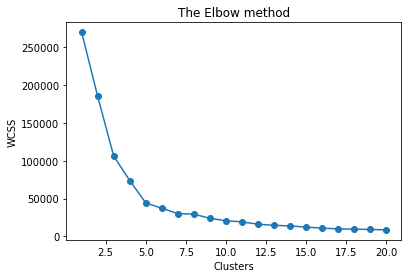

In [23]:
plt.scatter(range(1,21),wcss)
plt.plot(range(1,21),wcss)
plt.title('The Elbow method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

**Using elbow method we decided number of clusters are 5**

- now read the KMeans method

- give 5 clusters

- fit is using to calculate inertia

- once we got our optimal clusters , we need to get the clusters of each data point

- for that we need to use fit_predict

- predict the clusters on input X

In [24]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X) # Which data point belongs to which cluster
y_clusters

# Hare 0 = cluster_1 and 4 = cluster_5
# Python index start with zero

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [25]:
# here 0 = cluster_1
# and 4 = cluster_5
# python index start with zero
# y_clusters will give that
# we have 200 data points in X
# X[:3]
# income     spending score     cluster
#   15          39                 0       c1
#   15          81                 3       c4

In [26]:
mall_df['Cluster_group']=y_clusters

In [27]:
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [28]:
mall_df['Cluster_group'].value_counts()

Cluster_group
4    81
1    39
3    35
0    23
2    22
Name: count, dtype: int64

In [29]:
cols=['Annual Income (k$)','Spending Score (1-100)']
mall_df[mall_df['Cluster_group']==0][cols]

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29


In [30]:
# Group the data points

cs_1=mall_df[mall_df['Cluster_group']==0].iloc[:,[3,4]]
cs_2=mall_df[mall_df['Cluster_group']==1].iloc[:,[3,4]]
cs_3=mall_df[mall_df['Cluster_group']==2].iloc[:,[3,4]]
cs_4=mall_df[mall_df['Cluster_group']==3].iloc[:,[3,4]]
cs_5=mall_df[mall_df['Cluster_group']==4].iloc[:,[3,4]]
d1={"Cluster-1":cs_1.mean(),
    "Cluster-2":cs_2.mean(),
    "Cluster-3":cs_3.mean(),
    "Cluster-4":cs_4.mean(),
    "Cluster-5":cs_5.mean(),}
pd.DataFrame(d1)

,Cluster-1,Cluster-2,Cluster-3,Cluster-4,Cluster-5
Annual Income (k$),26.304348,86.538462,25.727273,88.200000,55.296296
Spending Score (1-100),20.913043,82.128205,79.363636,17.114286,49.518519


In [31]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

**groupby**

In [32]:
mall_df.groupby('Cluster_group')
# 5groups

In [33]:
list(mall_df.groupby('Cluster_group'))

[(0,
      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
  0            1    Male   19                  15                      39   
  2            3  Female   20                  16                       6   
  4            5  Female   31                  17                      40   
  6            7  Female   35                  18                       6   
  8            9    Male   64                  19                       3   
  10          11    Male   67                  19                      14   
  12          13  Female   58                  20                      15   
  14          15    Male   37                  20                      13   
  16          17  Female   35                  21                      35   
  18          19    Male   52                  23                      29   
  20          21    Male   35                  24                      35   
  22          23  Female   46                  25                      

In [34]:
list(mall_df.groupby('Cluster_group'))
mall_df.groupby('Cluster_group')['Cluster_group'].count()

Cluster_group
0    23
1    39
2    22
3    35
4    81
Name: Cluster_group, dtype: int64

In [35]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


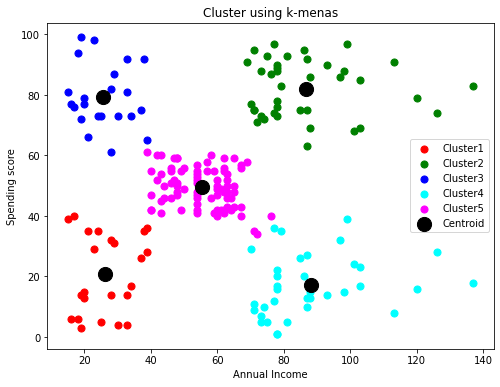

In [36]:
# Visualize the clusters
# We are applying scatter plotbetween income and spending score w.r.t clusters
X=mall_df.iloc[:,[3,4]].values
plt.figure(figsize=(8,6))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=50,c='red',label='Cluster1')
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=50,c='green',label='Cluster2')
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=50,c='blue',label='Cluster3')
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=50,c='cyan',label='Cluster4')
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=50,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroid')
plt.title('Cluster using k-menas')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

# Where s will give the size of the centriod

**Step 1: Import Required Library**

In [37]:
from sklearn.metrics import silhouette_score, silhouette_samples


**Step 2: Compute Silhouette Score for Overall Clustering**

- The Silhouette Score measures how well a data point fits within its assigned cluster. It ranges from -1 to 1:

- Close to +1 → Well-clustered
- Around 0 → Overlapping clusters
- Close to -1 → Misclassified

In [38]:
silhouette_avg = silhouette_score(X, y_clusters)
print(f"Overall Silhouette Score: {round(silhouette_avg,4)}")


Overall Silhouette Score: 0.5539


**Step 3: Compute Silhouette Score for Each Data Point**

- To see if specific points are well-clustered:

In [39]:
silhouette_values = silhouette_samples(X, y_clusters)

# Add silhouette scores to DataFrame
import pandas as pd
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])  # Change column names accordingly
df['Cluster'] = y_clusters
df['Silhouette Score'] = silhouette_values

# Display first few rows
df.head()


,Feature1,Feature2,Cluster,Silhouette Score
0,15,39,0,0.417005
1,15,81,2,0.696378
2,16,6,0,0.639953
3,16,77,2,0.696483
4,17,40,0,0.392300


**Step 4: Visualize Silhouette Scores**

- A Silhouette Plot helps interpret clustering performance.

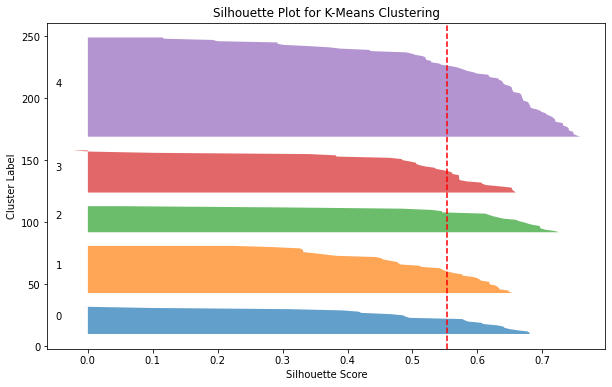

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Sort silhouette values by cluster
df_sorted = df.sort_values(by=['Cluster', 'Silhouette Score'], ascending=[True, False])

# Create plot
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):  # Change '5' to match your number of clusters
    cluster_silhouette_vals = df_sorted[df_sorted['Cluster'] == i]['Silhouette Score']
    cluster_size = len(cluster_silhouette_vals)
    y_upper = y_lower + cluster_size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10  

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering")
plt.show()


**Step 5: Find Misclassified Points**

- To identify poorly clustered points:

In [41]:
poorly_clustered_points = df[df['Silhouette Score'] < 0.25]  # Threshold (adjustable)
print("Potential Misclassified Points:")
print(poorly_clustered_points)


Potential Misclassified Points:
     Feature1  Feature2  Cluster  Silhouette Score
40         38        35        0          0.093423
42         39        36        0         -0.009278
43         39        61        4          0.117076
45         39        65        2          0.050721
124        70        29        3          0.003516
126        71        35        4          0.199404
132        72        34        4          0.115294
133        72        71        1          0.225413
142        76        40        4          0.192368
146        77        36        3         -0.023381
160        79        35        3          0.101842


$Hierarchical   Cluster$

**Linkage functions**

- Every observation consider as one cluster

- Based on symmetry matrix we form the groups

- Linkage functions

    - Simple linkage : Less distance that means more realtion
    
    - Complete linkage : Max distance that means less realtion
    
    - Average Ward Method

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
import scipy.cluster.hierarchy as sch
X=mall_df.iloc[:,[3,4]]
sch.linkage(X,method='single')

array([[ 48.        ,  49.        ,   0.        ,   2.        ],
       [ 65.        ,  68.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 63.        , 201.        ,   1.        ,   3.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 74.        ,  77.        ,   1.        ,   2.        ],
       [ 85.        , 209.        ,   1.        ,   3.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 76.        , 212.        ,   1.        ,   3.        ],
       [ 75.        , 213.        ,   1.        ,   4.        ],
       [ 81.        , 214

In [80]:
import scipy.cluster.hierarchy as sch
X=[[15,39],[15,81],[16,6],[16,77],[17,40],[17,76]]
sch.linkage(X)

array([[ 3.        ,  5.        ,  1.41421356,  2.        ],
       [ 0.        ,  4.        ,  2.23606798,  2.        ],
       [ 1.        ,  6.        ,  4.12310563,  3.        ],
       [ 2.        ,  7.        , 33.01514804,  3.        ],
       [ 8.        ,  9.        , 36.        ,  6.        ]])

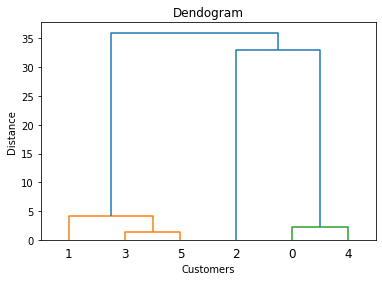

In [91]:
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [92]:
a=[15,39]
b=[15,81]
np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

42.0

In [93]:
arr1=np.array(a)
arr2=np.array(b)
np.sqrt(np.sum(np.square(arr1-arr2)))

42.0

**np.linear algebra method**

In [94]:
# works when data is in array
import numpy as np
val=np.array([[15,39],[15,81],[16,6],[16,77],[17,40],[17,76]])   #  first point is fixed checking distance between all other points
np.linalg.norm(val[0] -val[1])

42.0

In [95]:
import numpy as np
X=np.array(mall_df.iloc[:,[3,4]])

for i in range(len(X)):
    for j in range(i+1,len(X)):
        print(f'the distance between point {X[i]} and {X[j]} is: {np.linalg.norm(X[i] -X[j])}')

the distance between point [15 39] and [15 81] is: 42.0
the distance between point [15 39] and [16  6] is: 33.015148038438355
the distance between point [15 39] and [16 77] is: 38.01315561749642
the distance between point [15 39] and [17 40] is: 2.23606797749979
the distance between point [15 39] and [17 76] is: 37.05401462729781
the distance between point [15 39] and [18  6] is: 33.13608305156178
the distance between point [15 39] and [18 94] is: 55.08175741568164
the distance between point [15 39] and [19  3] is: 36.22154055254967
the distance between point [15 39] and [19 72] is: 33.24154027718932
the distance between point [15 39] and [19 14] is: 25.317977802344327
the distance between point [15 39] and [19 99] is: 60.13318551349163
the distance between point [15 39] and [20 15] is: 24.515301344262525
the distance between point [15 39] and [20 77] is: 38.3275357934736
the distance between point [15 39] and [20 13] is: 26.476404589747453
the distance between point [15 39] and [20 79

the distance between point [16  6] and [70 29] is: 58.69412236331676
the distance between point [16  6] and [70 77] is: 89.20201791439474
the distance between point [16  6] and [71 35] is: 62.177166226839255
the distance between point [16  6] and [71 95] is: 104.62313319720452
the distance between point [16  6] and [71 11] is: 55.226805085936306
the distance between point [16  6] and [71 75] is: 88.23831367382311
the distance between point [16  6] and [71  9] is: 55.08175741568164
the distance between point [16  6] and [71 75] is: 88.23831367382311
the distance between point [16  6] and [72 34] is: 62.609903369994115
the distance between point [16  6] and [72 71] is: 85.7962703152066
the distance between point [16  6] and [73  5] is: 57.0087712549569
the distance between point [16  6] and [73 88] is: 99.86490875177326
the distance between point [16  6] and [73  7] is: 57.0087712549569
the distance between point [16  6] and [73 73] is: 87.96590248499699
the distance between point [16  6

the distance between point [17 40] and [78 20] is: 64.19501538281614
the distance between point [17 40] and [78 76] is: 70.83078426785913
the distance between point [17 40] and [78 16] is: 65.55150646628954
the distance between point [17 40] and [78 89] is: 78.24321056807422
the distance between point [17 40] and [78  1] is: 72.40165743959182
the distance between point [17 40] and [78 78] is: 71.8679344353238
the distance between point [17 40] and [78  1] is: 72.40165743959182
the distance between point [17 40] and [78 73] is: 69.35416353759881
the distance between point [17 40] and [79 35] is: 62.20128616033595
the distance between point [17 40] and [79 83] is: 75.45197147855052
the distance between point [17 40] and [81  5] is: 72.94518489934754
the distance between point [17 40] and [81 93] is: 83.09632964216891
the distance between point [17 40] and [85 26] is: 69.42621983083913
the distance between point [17 40] and [85 75] is: 76.47875521999558
the distance between point [17 40] 

the distance between point [18  6] and [71  9] is: 53.08483775994799
the distance between point [18  6] and [71 75] is: 87.00574693662483
the distance between point [18  6] and [72 34] is: 60.8276253029822
the distance between point [18  6] and [72 71] is: 84.50443775329198
the distance between point [18  6] and [73  5] is: 55.00909015790027
the distance between point [18  6] and [73 88] is: 98.73702446397704
the distance between point [18  6] and [73  7] is: 55.00909015790027
the distance between point [18  6] and [73 73] is: 86.68333173107735
the distance between point [18  6] and [74 10] is: 56.142675390472796
the distance between point [18  6] and [74 72] is: 86.55634003352961
the distance between point [18  6] and [75  5] is: 57.0087712549569
the distance between point [18  6] and [75 93] is: 104.0096149401583
the distance between point [18  6] and [76 40] is: 67.23094525588644
the distance between point [18  6] and [76 87] is: 99.62429422585637
the distance between point [18  6] 

the distance between point [19  3] and [42 60] is: 61.465437442517235
the distance between point [19  3] and [43 54] is: 56.36488268416781
the distance between point [19  3] and [43 60] is: 61.84658438426491
the distance between point [19  3] and [43 45] is: 48.373546489791295
the distance between point [19  3] and [43 41] is: 44.94441010848846
the distance between point [19  3] and [44 50] is: 53.23532661682466
the distance between point [19  3] and [44 46] is: 49.73932046178355
the distance between point [19  3] and [46 51] is: 55.072679252057455
the distance between point [19  3] and [46 46] is: 50.774009099144415
the distance between point [19  3] and [46 56] is: 59.481089431852205
the distance between point [19  3] and [46 55] is: 58.59180830116101
the distance between point [19  3] and [47 52] is: 56.43580423808985
the distance between point [19  3] and [47 59] is: 62.609903369994115
the distance between point [19  3] and [48 51] is: 56.08029957123981
the distance between point [

the distance between point [19 14] and [43 45] is: 39.20459156782532
the distance between point [19 14] and [43 41] is: 36.124783736376884
the distance between point [19 14] and [44 50] is: 43.829214001622255
the distance between point [19 14] and [44 46] is: 40.607881008493905
the distance between point [19 14] and [46 51] is: 45.803929962395145
the distance between point [19 14] and [46 46] is: 41.86884283091664
the distance between point [19 14] and [46 56] is: 49.92995093127971
the distance between point [19 14] and [46 55] is: 49.09175083453431
the distance between point [19 14] and [47 52] is: 47.20169488482379
the distance between point [19 14] and [47 59] is: 53.0
the distance between point [19 14] and [48 51] is: 47.01063709417264
the distance between point [19 14] and [48 59] is: 53.53503525729669
the distance between point [19 14] and [48 50] is: 46.22769732530488
the distance between point [19 14] and [48 48] is: 44.68780594300866
the distance between point [19 14] and [48 

the distance between point [20 15] and [29 87] is: 72.56031973468694
the distance between point [20 15] and [30  4] is: 14.866068747318506
the distance between point [20 15] and [30 73] is: 58.855755878248644
the distance between point [20 15] and [33  4] is: 17.029386365926403
the distance between point [20 15] and [33 92] is: 78.08969202141856
the distance between point [20 15] and [33 14] is: 13.038404810405298
the distance between point [20 15] and [33 81] is: 67.26812023536856
the distance between point [20 15] and [34 17] is: 14.142135623730951
the distance between point [20 15] and [34 73] is: 59.665735560705194
the distance between point [20 15] and [37 26] is: 20.248456731316587
the distance between point [20 15] and [37 75] is: 62.36184731067546
the distance between point [20 15] and [38 35] is: 26.90724809414742
the distance between point [20 15] and [38 92] is: 79.07591289387686
the distance between point [20 15] and [39 36] is: 28.319604517012593
the distance between point

the distance between point [20 77] and [71 75] is: 51.03920062069938
the distance between point [20 77] and [72 34] is: 67.47592163134935
the distance between point [20 77] and [72 71] is: 52.3450093132096
the distance between point [20 77] and [73  5] is: 89.40357934669059
the distance between point [20 77] and [73 88] is: 54.12947441089743
the distance between point [20 77] and [73  7] is: 87.80091115700337
the distance between point [20 77] and [73 73] is: 53.150729063673246
the distance between point [20 77] and [74 10] is: 86.05230967266364
the distance between point [20 77] and [74 72] is: 54.230987451824994
the distance between point [20 77] and [75  5] is: 90.60353193998566
the distance between point [20 77] and [75 93] is: 57.28001396647874
the distance between point [20 77] and [76 40] is: 67.11929677819934
the distance between point [20 77] and [76 87] is: 56.88585061331157
the distance between point [20 77] and [77 12] is: 86.45229898620394
the distance between point [20 77

the distance between point [20 79] and [75  5] is: 92.20086767487604
the distance between point [20 79] and [75 93] is: 56.753854494650845
the distance between point [20 79] and [76 40] is: 68.24221567329127
the distance between point [20 79] and [76 87] is: 56.568542494923804
the distance between point [20 79] and [77 12] is: 87.96590248499699
the distance between point [20 79] and [77 97] is: 59.77457653551382
the distance between point [20 79] and [77 36] is: 71.40028011149536
the distance between point [20 79] and [77 74] is: 57.21887800367987
the distance between point [20 79] and [78 22] is: 81.32035415564789
the distance between point [20 79] and [78 90] is: 59.033888572581766
the distance between point [20 79] and [78 17] is: 84.8999411071645
the distance between point [20 79] and [78 88] is: 58.69412236331676
the distance between point [20 79] and [78 20] is: 82.73451516749222
the distance between point [20 79] and [78 76] is: 58.077534382926416
the distance between point [20 

the distance between point [21 66] and [101  68] is: 80.02499609497022
the distance between point [21 66] and [103  17] is: 95.524865872714
the distance between point [21 66] and [103  85] is: 84.17244204607586
the distance between point [21 66] and [103  23] is: 92.59049627256569
the distance between point [21 66] and [103  69] is: 82.05485969764375
the distance between point [21 66] and [113   8] is: 108.75660899458019
the distance between point [21 66] and [113  91] is: 95.33624704172071
the distance between point [21 66] and [120  16] is: 110.90987332063814
the distance between point [21 66] and [120  79] is: 99.84988733093293
the distance between point [21 66] and [126  28] is: 111.66467659918243
the distance between point [21 66] and [126  74] is: 105.30432089900205
the distance between point [21 66] and [137  18] is: 125.53883861180172
the distance between point [21 66] and [137  83] is: 117.23907198540937
the distance between point [23 29] and [23 98] is: 69.0
the distance betw

the distance between point [23 98] and [65 48] is: 65.29931086925804
the distance between point [23 98] and [65 50] is: 63.7808748764079
the distance between point [23 98] and [65 43] is: 69.20260110718382
the distance between point [23 98] and [65 59] is: 57.3149195236284
the distance between point [23 98] and [67 43] is: 70.43436661176133
the distance between point [23 98] and [67 57] is: 60.14149981501958
the distance between point [23 98] and [67 56] is: 60.8276253029822
the distance between point [23 98] and [67 40] is: 72.80109889280519
the distance between point [23 98] and [69 58] is: 60.959002616512684
the distance between point [23 98] and [69 91] is: 46.52956049652737
the distance between point [23 98] and [70 29] is: 83.48652585896721
the distance between point [23 98] and [70 77] is: 51.478150704935004
the distance between point [23 98] and [71 35] is: 79.20227269466452
the distance between point [23 98] and [71 95] is: 48.093658625644196
the distance between point [23 98]

the distance between point [24 73] and [38 92] is: 23.600847442411894
the distance between point [24 73] and [39 36] is: 39.92492955535426
the distance between point [24 73] and [39 61] is: 19.209372712298546
the distance between point [24 73] and [39 28] is: 47.43416490252569
the distance between point [24 73] and [39 65] is: 17.0
the distance between point [24 73] and [40 55] is: 24.08318915758459
the distance between point [24 73] and [40 47] is: 30.528675044947494
the distance between point [24 73] and [40 42] is: 34.88552708502482
the distance between point [24 73] and [40 42] is: 34.88552708502482
the distance between point [24 73] and [42 52] is: 27.65863337187866
the distance between point [24 73] and [42 60] is: 22.20360331117452
the distance between point [24 73] and [43 54] is: 26.870057685088806
the distance between point [24 73] and [43 60] is: 23.021728866442675
the distance between point [24 73] and [43 45] is: 33.83784863137726
the distance between point [24 73] and [43

the distance between point [25 73] and [46 55] is: 27.65863337187866
the distance between point [25 73] and [47 52] is: 30.4138126514911
the distance between point [25 73] and [47 59] is: 26.076809620810597
the distance between point [25 73] and [48 51] is: 31.827660925679098
the distance between point [25 73] and [48 59] is: 26.92582403567252
the distance between point [25 73] and [48 50] is: 32.526911934581186
the distance between point [25 73] and [48 48] is: 33.97057550292606
the distance between point [25 73] and [48 59] is: 26.92582403567252
the distance between point [25 73] and [48 47] is: 34.713109915419565
the distance between point [25 73] and [49 55] is: 30.0
the distance between point [25 73] and [49 42] is: 39.20459156782532
the distance between point [25 73] and [50 49] is: 34.655446902326915
the distance between point [25 73] and [50 56] is: 30.23243291566195
the distance between point [25 73] and [54 47] is: 38.948684188300895
the distance between point [25 73] and [54

the distance between point [28 82] and [71  9] is: 84.72307831990054
the distance between point [28 82] and [71 75] is: 43.56604182158393
the distance between point [28 82] and [72 34] is: 65.11528238439882
the distance between point [28 82] and [72 71] is: 45.35416188179427
the distance between point [28 82] and [73  5] is: 89.1852005660132
the distance between point [28 82] and [73 88] is: 45.39823785126467
the distance between point [28 82] and [73  7] is: 87.46427842267951
the distance between point [28 82] and [73 73] is: 45.89117562233506
the distance between point [28 82] and [74 10] is: 85.44003745317531
the distance between point [28 82] and [74 72] is: 47.07440918375928
the distance between point [28 82] and [75  5] is: 90.21086409075129
the distance between point [28 82] and [75 93] is: 48.27007354458868
the distance between point [28 82] and [76 40] is: 63.7808748764079
the distance between point [28 82] and [76 87] is: 48.25971404805462
the distance between point [28 82] a

the distance between point [28 61] and [42 52] is: 16.64331697709324
the distance between point [28 61] and [42 60] is: 14.035668847618199
the distance between point [28 61] and [43 54] is: 16.55294535724685
the distance between point [28 61] and [43 60] is: 15.033296378372908
the distance between point [28 61] and [43 45] is: 21.93171219946131
the distance between point [28 61] and [43 41] is: 25.0
the distance between point [28 61] and [44 50] is: 19.4164878389476
the distance between point [28 61] and [44 46] is: 21.93171219946131
the distance between point [28 61] and [46 51] is: 20.591260281974
the distance between point [28 61] and [46 46] is: 23.430749027719962
the distance between point [28 61] and [46 56] is: 18.681541692269406
the distance between point [28 61] and [46 55] is: 18.973665961010276
the distance between point [28 61] and [47 52] is: 21.02379604162864
the distance between point [28 61] and [47 59] is: 19.1049731745428
the distance between point [28 61] and [48 51]

the distance between point [29 31] and [81  5] is: 58.137767414994535
the distance between point [29 31] and [81 93] is: 80.91971329657564
the distance between point [29 31] and [85 26] is: 56.22277118748239
the distance between point [29 31] and [85 75] is: 71.21797525905943
the distance between point [29 31] and [86 20] is: 58.05170109479997
the distance between point [29 31] and [86 95] is: 85.70297544426332
the distance between point [29 31] and [87 27] is: 58.137767414994535
the distance between point [29 31] and [87 63] is: 66.24198064671678
the distance between point [29 31] and [87 13] is: 60.728905802755904
the distance between point [29 31] and [87 75] is: 72.80109889280519
the distance between point [29 31] and [87 10] is: 61.68468205316454
the distance between point [29 31] and [87 92] is: 84.17244204607586
the distance between point [29 31] and [88 13] is: 61.68468205316454
the distance between point [29 31] and [88 86] is: 80.65977932030313
the distance between point [29 

the distance between point [29 87] and [97 86] is: 68.00735254367721
the distance between point [29 87] and [98 15] is: 99.72462083156798
the distance between point [29 87] and [98 88] is: 69.00724599634447
the distance between point [29 87] and [99 39] is: 84.87638069569178
the distance between point [29 87] and [99 97] is: 70.71067811865476
the distance between point [29 87] and [101  24] is: 95.67131231461184
the distance between point [29 87] and [101  68] is: 74.46475676452586
the distance between point [29 87] and [103  17] is: 101.86265262597475
the distance between point [29 87] and [103  85] is: 74.02702209328699
the distance between point [29 87] and [103  23] is: 97.83659846908007
the distance between point [29 87] and [103  69] is: 76.15773105863909
the distance between point [29 87] and [113   8] is: 115.31261856362468
the distance between point [29 87] and [113  91] is: 84.09518416651456
the distance between point [29 87] and [120  16] is: 115.42096863222038
the distance 

the distance between point [33  4] and [40 42] is: 38.63935817272331
the distance between point [33  4] and [42 52] is: 48.83646178829912
the distance between point [33  4] and [42 60] is: 56.71860364994893
the distance between point [33  4] and [43 54] is: 50.99019513592785
the distance between point [33  4] and [43 60] is: 56.88585061331157
the distance between point [33  4] and [43 45] is: 42.20189569201838
the distance between point [33  4] and [43 41] is: 38.3275357934736
the distance between point [33  4] and [44 50] is: 47.29693436154187
the distance between point [33  4] and [44 46] is: 43.41658669218482
the distance between point [33  4] and [46 51] is: 48.76474136094644
the distance between point [33  4] and [46 46] is: 43.965895873961216
the distance between point [33  4] and [46 56] is: 53.600373133029585
the distance between point [33  4] and [46 55] is: 52.630789467763066
the distance between point [33  4] and [47 52] is: 50.0
the distance between point [33  4] and [47 59

the distance between point [33 14] and [50 49] is: 38.91015291668744
the distance between point [33 14] and [50 56] is: 45.31004303683677
the distance between point [33 14] and [54 47] is: 39.11521443121589
the distance between point [33 14] and [54 54] is: 45.17742799230607
the distance between point [33 14] and [54 53] is: 44.294469180700204
the distance between point [33 14] and [54 48] is: 39.96248240537617
the distance between point [33 14] and [54 52] is: 43.41658669218482
the distance between point [33 14] and [54 42] is: 35.0
the distance between point [33 14] and [54 51] is: 42.5440947723653
the distance between point [33 14] and [54 55] is: 46.06517122512408
the distance between point [33 14] and [54 41] is: 34.20526275297414
the distance between point [33 14] and [54 44] is: 36.61966684720111
the distance between point [33 14] and [54 57] is: 47.853944456021594
the distance between point [33 14] and [54 46] is: 38.27531841800928
the distance between point [33 14] and [57 58]

the distance between point [34 17] and [62 59] is: 50.47771785649585
the distance between point [34 17] and [62 55] is: 47.20169488482379
the distance between point [34 17] and [62 56] is: 48.010415536631214
the distance between point [34 17] and [62 42] is: 37.53664875824692
the distance between point [34 17] and [63 50] is: 43.93176527297759
the distance between point [34 17] and [63 46] is: 41.012193308819754
the distance between point [34 17] and [63 43] is: 38.948684188300895
the distance between point [34 17] and [63 48] is: 42.44997055358225
the distance between point [34 17] and [63 52] is: 45.45327270945405
the distance between point [34 17] and [63 54] is: 47.01063709417264
the distance between point [34 17] and [64 42] is: 39.05124837953327
the distance between point [34 17] and [64 46] is: 41.72529209005013
the distance between point [34 17] and [65 48] is: 43.840620433565945
the distance between point [34 17] and [65 50] is: 45.27692569068709
the distance between point [34

the distance between point [37 26] and [62 48] is: 33.301651610693426
the distance between point [37 26] and [62 59] is: 41.400483088968905
the distance between point [37 26] and [62 55] is: 38.28837943815329
the distance between point [37 26] and [62 56] is: 39.05124837953327
the distance between point [37 26] and [62 42] is: 29.68164415931166
the distance between point [37 26] and [63 50] is: 35.38361202590826
the distance between point [37 26] and [63 46] is: 32.802438933713454
the distance between point [37 26] and [63 43] is: 31.064449134018133
the distance between point [37 26] and [63 48] is: 34.058772731852805
the distance between point [37 26] and [63 52] is: 36.76955262170047
the distance between point [37 26] and [63 54] is: 38.2099463490856
the distance between point [37 26] and [64 42] is: 31.38470965295043
the distance between point [37 26] and [64 46] is: 33.60059523282288
the distance between point [37 26] and [65 48] is: 35.608987629529715
the distance between point [3

the distance between point [37 75] and [54 52] is: 28.600699292150182
the distance between point [37 75] and [54 42] is: 37.12142238654117
the distance between point [37 75] and [54 51] is: 29.410882339705484
the distance between point [37 75] and [54 55] is: 26.248809496813376
the distance between point [37 75] and [54 41] is: 38.01315561749642
the distance between point [37 75] and [54 44] is: 35.35533905932738
the distance between point [37 75] and [54 57] is: 24.758836806279895
the distance between point [37 75] and [54 46] is: 33.61547262794322
the distance between point [37 75] and [57 58] is: 26.248809496813376
the distance between point [37 75] and [57 55] is: 28.284271247461902
the distance between point [37 75] and [58 60] is: 25.80697580112788
the distance between point [37 75] and [58 46] is: 35.805027579936315
the distance between point [37 75] and [59 55] is: 29.732137494637012
the distance between point [37 75] and [59 41] is: 40.496913462633174
the distance between poin

the distance between point [38 92] and [71 95] is: 33.13608305156178
the distance between point [38 92] and [71 11] is: 87.46427842267951
the distance between point [38 92] and [71 75] is: 37.12142238654117
the distance between point [38 92] and [71  9] is: 89.31965069345043
the distance between point [38 92] and [71 75] is: 37.12142238654117
the distance between point [38 92] and [72 34] is: 67.23094525588644
the distance between point [38 92] and [72 71] is: 39.96248240537617
the distance between point [38 92] and [73  5] is: 93.77632963600144
the distance between point [38 92] and [73 88] is: 35.22782990761707
the distance between point [38 92] and [73  7] is: 91.92388155425118
the distance between point [38 92] and [73 73] is: 39.824615503479755
the distance between point [38 92] and [74 10] is: 89.55445270895244
the distance between point [38 92] and [74 72] is: 41.182520563948
the distance between point [38 92] and [75  5] is: 94.54099639838793
the distance between point [38 92] 

the distance between point [39 28] and [67 56] is: 39.59797974644666
the distance between point [39 28] and [67 40] is: 30.463092423455635
the distance between point [39 28] and [69 58] is: 42.42640687119285
the distance between point [39 28] and [69 91] is: 69.77822009767804
the distance between point [39 28] and [70 29] is: 31.016124838541646
the distance between point [39 28] and [70 77] is: 57.982756057296896
the distance between point [39 28] and [71 35] is: 32.7566787083184
the distance between point [39 28] and [71 95] is: 74.24957912338628
the distance between point [39 28] and [71 11] is: 36.235341863986875
the distance between point [39 28] and [71 75] is: 56.859475903318
the distance between point [39 28] and [71  9] is: 37.21558813185679
the distance between point [39 28] and [71 75] is: 56.859475903318
the distance between point [39 28] and [72 34] is: 33.54101966249684
the distance between point [39 28] and [72 71] is: 54.20332093147061
the distance between point [39 28] 

the distance between point [40 47] and [54 42] is: 14.866068747318506
the distance between point [40 47] and [54 51] is: 14.560219778561036
the distance between point [40 47] and [54 55] is: 16.1245154965971
the distance between point [40 47] and [54 41] is: 15.231546211727817
the distance between point [40 47] and [54 44] is: 14.317821063276353
the distance between point [40 47] and [54 57] is: 17.204650534085253
the distance between point [40 47] and [54 46] is: 14.035668847618199
the distance between point [40 47] and [57 58] is: 20.248456731316587
the distance between point [40 47] and [57 55] is: 18.788294228055936
the distance between point [40 47] and [58 60] is: 22.20360331117452
the distance between point [40 47] and [58 46] is: 18.027756377319946
the distance between point [40 47] and [59 55] is: 20.615528128088304
the distance between point [40 47] and [59 41] is: 19.924858845171276
the distance between point [40 47] and [60 49] is: 20.09975124224178
the distance between poi

the distance between point [40 42] and [79 83] is: 56.586217403180434
the distance between point [40 42] and [81  5] is: 55.226805085936306
the distance between point [40 42] and [81 93] is: 65.43699259593154
the distance between point [40 42] and [85 26] is: 47.75981574503821
the distance between point [40 42] and [85 75] is: 55.80322571321482
the distance between point [40 42] and [86 20] is: 50.99019513592785
the distance between point [40 42] and [86 95] is: 70.178344238091
the distance between point [40 42] and [87 27] is: 49.33558553417604
the distance between point [40 42] and [87 63] is: 51.478150704935004
the distance between point [40 42] and [87 13] is: 55.226805085936306
the distance between point [40 42] and [87 75] is: 57.42821606144492
the distance between point [40 42] and [87 10] is: 56.859475903318
the distance between point [40 42] and [87 92] is: 68.62215385719105
the distance between point [40 42] and [88 13] is: 56.08029957123981
the distance between point [40 42]

the distance between point [40 42] and [93 14] is: 59.941638282582836
the distance between point [40 42] and [93 90] is: 71.50524456289902
the distance between point [40 42] and [97 32] is: 57.87054518492115
the distance between point [40 42] and [97 86] is: 72.00694410957877
the distance between point [40 42] and [98 15] is: 63.97655820689325
the distance between point [40 42] and [98 88] is: 74.02702209328699
the distance between point [40 42] and [99 39] is: 59.07622195096772
the distance between point [40 42] and [99 97] is: 80.65977932030313
the distance between point [40 42] and [101  24] is: 63.60031446463138
the distance between point [40 42] and [101  68] is: 66.30987860040162
the distance between point [40 42] and [103  17] is: 67.77905281132217
the distance between point [40 42] and [103  85] is: 76.27581530209953
the distance between point [40 42] and [103  23] is: 65.80273550544841
the distance between point [40 42] and [103  69] is: 68.54195795277518
the distance between 

the distance between point [42 60] and [54 47] is: 17.69180601295413
the distance between point [42 60] and [54 54] is: 13.416407864998739
the distance between point [42 60] and [54 53] is: 13.892443989449804
the distance between point [42 60] and [54 48] is: 16.97056274847714
the distance between point [42 60] and [54 52] is: 14.422205101855956
the distance between point [42 60] and [54 42] is: 21.633307652783937
the distance between point [42 60] and [54 51] is: 15.0
the distance between point [42 60] and [54 55] is: 13.0
the distance between point [42 60] and [54 41] is: 22.47220505424423
the distance between point [42 60] and [54 44] is: 20.0
the distance between point [42 60] and [54 57] is: 12.36931687685298
the distance between point [42 60] and [54 46] is: 18.439088914585774
the distance between point [42 60] and [57 58] is: 15.132745950421556
the distance between point [42 60] and [57 55] is: 15.811388300841896
the distance between point [42 60] and [58 60] is: 16.0
the distan

the distance between point [43 60] and [62 59] is: 19.026297590440446
the distance between point [43 60] and [62 55] is: 19.6468827043885
the distance between point [43 60] and [62 56] is: 19.4164878389476
the distance between point [43 60] and [62 42] is: 26.1725046566048
the distance between point [43 60] and [63 50] is: 22.360679774997898
the distance between point [43 60] and [63 46] is: 24.413111231467404
the distance between point [43 60] and [63 43] is: 26.248809496813376
the distance between point [43 60] and [63 48] is: 23.323807579381203
the distance between point [43 60] and [63 52] is: 21.540659228538015
the distance between point [43 60] and [63 54] is: 20.8806130178211
the distance between point [43 60] and [64 42] is: 27.65863337187866
the distance between point [43 60] and [64 46] is: 25.238858928247925
the distance between point [43 60] and [65 48] is: 25.059928172283335
the distance between point [43 60] and [65 50] is: 24.166091947189145
the distance between point [4

the distance between point [43 45] and [113   8] is: 79.17701686727027
the distance between point [43 45] and [113  91] is: 83.7615663654877
the distance between point [43 45] and [120  16] is: 82.28000972289685
the distance between point [43 45] and [120  79] is: 84.17244204607586
the distance between point [43 45] and [126  28] is: 84.72307831990054
the distance between point [43 45] and [126  74] is: 87.92041856133307
the distance between point [43 45] and [137  18] is: 97.8008179924892
the distance between point [43 45] and [137  83] is: 101.39033484509261
the distance between point [43 41] and [44 50] is: 9.055385138137417
the distance between point [43 41] and [44 46] is: 5.0990195135927845
the distance between point [43 41] and [46 51] is: 10.44030650891055
the distance between point [43 41] and [46 46] is: 5.830951894845301
the distance between point [43 41] and [46 56] is: 15.297058540778355
the distance between point [43 41] and [46 55] is: 14.317821063276353
the distance bet

the distance between point [44 50] and [98 15] is: 64.35060217278468
the distance between point [44 50] and [98 88] is: 66.03029607687671
the distance between point [44 50] and [99 39] is: 56.089214649520635
the distance between point [44 50] and [99 97] is: 72.34638899074369
the distance between point [44 50] and [101  24] is: 62.64982043070834
the distance between point [44 50] and [101  68] is: 59.77457653551382
the distance between point [44 50] and [103  17] is: 67.60177512462228
the distance between point [44 50] and [103  85] is: 68.60029154456998
the distance between point [44 50] and [103  23] is: 64.88451279003334
the distance between point [44 50] and [103  69] is: 61.98386886924694
the distance between point [44 50] and [113   8] is: 80.77747210701756
the distance between point [44 50] and [113  91] is: 80.26207074328447
the distance between point [44 50] and [120  16] is: 83.2586331859946
the distance between point [44 50] and [120  79] is: 81.34494452638098
the distance b

the distance between point [46 46] and [74 72] is: 38.2099463490856
the distance between point [46 46] and [75  5] is: 50.21951811795888
the distance between point [46 46] and [75 93] is: 55.226805085936306
the distance between point [46 46] and [76 40] is: 30.59411708155671
the distance between point [46 46] and [76 87] is: 50.80354318352215
the distance between point [46 46] and [77 12] is: 46.010868281309364
the distance between point [46 46] and [77 97] is: 59.682493245507096
the distance between point [46 46] and [77 36] is: 32.57299494980466
the distance between point [46 46] and [77 74] is: 41.773197148410844
the distance between point [46 46] and [78 22] is: 40.0
the distance between point [46 46] and [78 90] is: 54.405882034941776
the distance between point [46 46] and [78 17] is: 43.18564576337837
the distance between point [46 46] and [78 88] is: 52.80151512977634
the distance between point [46 46] and [78 20] is: 41.23105625617661
the distance between point [46 46] and [78 

the distance between point [47 52] and [86 20] is: 50.44799302251776
the distance between point [47 52] and [86 95] is: 58.05170109479997
the distance between point [47 52] and [87 27] is: 47.16990566028302
the distance between point [47 52] and [87 63] is: 41.48493702538308
the distance between point [47 52] and [87 13] is: 55.86591089385369
the distance between point [47 52] and [87 75] is: 46.14108798023731
the distance between point [47 52] and [87 10] is: 58.0
the distance between point [47 52] and [87 92] is: 56.568542494923804
the distance between point [47 52] and [88 13] is: 56.586217403180434
the distance between point [47 52] and [88 86] is: 53.2634959423431
the distance between point [47 52] and [88 15] is: 55.226805085936306
the distance between point [47 52] and [88 69] is: 44.384682042344295
the distance between point [47 52] and [93 14] is: 59.665735560705194
the distance between point [47 52] and [93 90] is: 59.665735560705194
the distance between point [47 52] and [97

the distance between point [48 59] and [60 47] is: 16.97056274847714
the distance between point [48 59] and [60 50] is: 15.0
the distance between point [48 59] and [61 42] is: 21.400934559032695
the distance between point [48 59] and [61 49] is: 16.401219466856727
the distance between point [48 59] and [62 41] is: 22.80350850198276
the distance between point [48 59] and [62 48] is: 17.804493814764857
the distance between point [48 59] and [62 59] is: 14.0
the distance between point [48 59] and [62 55] is: 14.560219778561036
the distance between point [48 59] and [62 56] is: 14.317821063276353
the distance between point [48 59] and [62 42] is: 22.02271554554524
the distance between point [48 59] and [63 50] is: 17.4928556845359
the distance between point [48 59] and [63 46] is: 19.849433241279208
the distance between point [48 59] and [63 43] is: 21.93171219946131
the distance between point [48 59] and [63 48] is: 18.601075237738275
the distance between point [48 59] and [63 52] is: 16.

the distance between point [48 48] and [73 88] is: 47.16990566028302
the distance between point [48 48] and [73  7] is: 48.02082881417188
the distance between point [48 48] and [73 73] is: 35.35533905932738
the distance between point [48 48] and [74 10] is: 46.04345773288535
the distance between point [48 48] and [74 72] is: 35.38361202590826
the distance between point [48 48] and [75  5] is: 50.774009099144415
the distance between point [48 48] and [75 93] is: 52.478567053607705
the distance between point [48 48] and [76 40] is: 29.120439557122072
the distance between point [48 48] and [76 87] is: 48.010415536631214
the distance between point [48 48] and [77 12] is: 46.22769732530488
the distance between point [48 48] and [77 97] is: 56.938563381947034
the distance between point [48 48] and [77 36] is: 31.38470965295043
the distance between point [48 48] and [77 74] is: 38.948684188300895
the distance between point [48 48] and [78 22] is: 39.698866482558415
the distance between point 

the distance between point [48 47] and [88 13] is: 52.49761899362675
the distance between point [48 47] and [88 86] is: 55.86591089385369
the distance between point [48 47] and [88 15] is: 51.22499389946279
the distance between point [48 47] and [88 69] is: 45.65084884205331
the distance between point [48 47] and [93 14] is: 55.80322571321482
the distance between point [48 47] and [93 90] is: 62.24146527838174
the distance between point [48 47] and [97 32] is: 51.24451190127583
the distance between point [48 47] and [97 86] is: 62.625873247404705
the distance between point [48 47] and [98 15] is: 59.36328831862332
the distance between point [48 47] and [98 88] is: 64.66065264130884
the distance between point [48 47] and [99 39] is: 51.62363799656123
the distance between point [48 47] and [99 97] is: 71.42128534267638
the distance between point [48 47] and [101  24] is: 57.77542730261716
the distance between point [48 47] and [101  68] is: 57.0087712549569
the distance between point [48

the distance between point [50 49] and [97 32] is: 49.9799959983992
the distance between point [50 49] and [97 86] is: 59.81638571495272
the distance between point [50 49] and [98 15] is: 58.82176467941097
the distance between point [50 49] and [98 88] is: 61.84658438426491
the distance between point [50 49] and [99 39] is: 50.00999900019995
the distance between point [50 49] and [99 97] is: 68.59300255857006
the distance between point [50 49] and [101  24] is: 56.79788728465171
the distance between point [50 49] and [101  68] is: 54.42425929675111
the distance between point [50 49] and [103  17] is: 61.91122676865643
the distance between point [50 49] and [103  85] is: 64.07027391856539
the distance between point [50 49] and [103  23] is: 59.033888572581766
the distance between point [50 49] and [103  69] is: 56.64803615307419
the distance between point [50 49] and [113   8] is: 75.16648189186454
the distance between point [50 49] and [113  91] is: 75.71657678474378
the distance betwe

the distance between point [54 54] and [65 43] is: 15.556349186104045
the distance between point [54 54] and [65 59] is: 12.083045973594572
the distance between point [54 54] and [67 43] is: 17.029386365926403
the distance between point [54 54] and [67 57] is: 13.341664064126334
the distance between point [54 54] and [67 56] is: 13.152946437965905
the distance between point [54 54] and [67 40] is: 19.1049731745428
the distance between point [54 54] and [69 58] is: 15.524174696260024
the distance between point [54 54] and [69 91] is: 39.92492955535426
the distance between point [54 54] and [70 29] is: 29.68164415931166
the distance between point [54 54] and [70 77] is: 28.0178514522438
the distance between point [54 54] and [71 35] is: 25.495097567963924
the distance between point [54 54] and [71 95] is: 44.384682042344295
the distance between point [54 54] and [71 11] is: 46.238512086787566
the distance between point [54 54] and [71 75] is: 27.018512172212592
the distance between point

the distance between point [54 53] and [98 88] is: 56.22277118748239
the distance between point [54 53] and [99 39] is: 47.12748667179272
the distance between point [54 53] and [99 97] is: 62.93647591023825
the distance between point [54 53] and [101  24] is: 55.226805085936306
the distance between point [54 53] and [101  68] is: 49.33558553417604
the distance between point [54 53] and [103  17] is: 60.802960454241045
the distance between point [54 53] and [103  85] is: 58.52349955359813
the distance between point [54 53] and [103  23] is: 57.4543296888929
the distance between point [54 53] and [103  69] is: 51.54609587543949
the distance between point [54 53] and [113   8] is: 74.2024258363566
the distance between point [54 53] and [113  91] is: 70.178344238091
the distance between point [54 53] and [120  16] is: 75.66372975210778
the distance between point [54 53] and [120  79] is: 70.9365914038728
the distance between point [54 53] and [126  28] is: 76.21679604916491
the distance be

the distance between point [54 42] and [103  17] is: 55.00909015790027
the distance between point [54 42] and [103  85] is: 65.19202405202648
the distance between point [54 42] and [103  23] is: 52.55473337388365
the distance between point [54 42] and [103  69] is: 55.94640292279746
the distance between point [54 42] and [113   8] is: 68.09552114493287
the distance between point [54 42] and [113  91] is: 76.69419795525604
the distance between point [54 42] and [120  16] is: 70.9365914038728
the distance between point [54 42] and [120  79] is: 75.66372975210778
the distance between point [54 42] and [126  28] is: 73.348483283569
the distance between point [54 42] and [126  74] is: 78.79086241436883
the distance between point [54 42] and [137  18] is: 86.40023148117139
the distance between point [54 42] and [137  83] is: 92.57429448826494
the distance between point [54 51] and [54 55] is: 4.0
the distance between point [54 51] and [54 41] is: 10.0
the distance between point [54 51] and [

the distance between point [54 41] and [78 89] is: 53.665631459994955
the distance between point [54 41] and [78  1] is: 46.647615158762406
the distance between point [54 41] and [78 78] is: 44.10215414239989
the distance between point [54 41] and [78  1] is: 46.647615158762406
the distance between point [54 41] and [78 73] is: 40.0
the distance between point [54 41] and [79 35] is: 25.709920264364882
the distance between point [54 41] and [79 83] is: 48.877397639399746
the distance between point [54 41] and [81  5] is: 45.0
the distance between point [54 41] and [81 93] is: 58.59180830116101
the distance between point [54 41] and [85 26] is: 34.438350715445125
the distance between point [54 41] and [85 75] is: 46.010868281309364
the distance between point [54 41] and [86 20] is: 38.27531841800928
the distance between point [54 41] and [86 95] is: 62.76941930590086
the distance between point [54 41] and [87 27] is: 35.84689665786984
the distance between point [54 41] and [87 63] is: 39

the distance between point [57 58] and [60 52] is: 6.708203932499369
the distance between point [57 58] and [60 47] is: 11.40175425099138
the distance between point [57 58] and [60 50] is: 8.54400374531753
the distance between point [57 58] and [61 42] is: 16.492422502470642
the distance between point [57 58] and [61 49] is: 9.848857801796104
the distance between point [57 58] and [62 41] is: 17.72004514666935
the distance between point [57 58] and [62 48] is: 11.180339887498949
the distance between point [57 58] and [62 59] is: 5.0990195135927845
the distance between point [57 58] and [62 55] is: 5.830951894845301
the distance between point [57 58] and [62 56] is: 5.385164807134504
the distance between point [57 58] and [62 42] is: 16.76305461424021
the distance between point [57 58] and [63 50] is: 10.0
the distance between point [57 58] and [63 46] is: 13.416407864998739
the distance between point [57 58] and [63 43] is: 16.15549442140351
the distance between point [57 58] and [63 4

the distance between point [59 55] and [61 42] is: 13.152946437965905
the distance between point [59 55] and [61 49] is: 6.324555320336759
the distance between point [59 55] and [62 41] is: 14.317821063276353
the distance between point [59 55] and [62 48] is: 7.615773105863909
the distance between point [59 55] and [62 59] is: 5.0
the distance between point [59 55] and [62 55] is: 3.0
the distance between point [59 55] and [62 56] is: 3.1622776601683795
the distance between point [59 55] and [62 42] is: 13.341664064126334
the distance between point [59 55] and [63 50] is: 6.4031242374328485
the distance between point [59 55] and [63 46] is: 9.848857801796104
the distance between point [59 55] and [63 43] is: 12.649110640673518
the distance between point [59 55] and [63 48] is: 8.06225774829855
the distance between point [59 55] and [63 52] is: 5.0
the distance between point [59 55] and [63 54] is: 4.123105625617661
the distance between point [59 55] and [64 42] is: 13.92838827718412
th

the distance between point [60 42] and [71 35] is: 13.038404810405298
the distance between point [60 42] and [71 95] is: 54.12947441089743
the distance between point [60 42] and [71 11] is: 32.89376840679705
the distance between point [60 42] and [71 75] is: 34.785054261852174
the distance between point [60 42] and [71  9] is: 34.785054261852174
the distance between point [60 42] and [71 75] is: 34.785054261852174
the distance between point [60 42] and [72 34] is: 14.422205101855956
the distance between point [60 42] and [72 71] is: 31.38470965295043
the distance between point [60 42] and [73  5] is: 39.21734310225516
the distance between point [60 42] and [73 88] is: 47.80167361086848
the distance between point [60 42] and [73  7] is: 37.33630940518894
the distance between point [60 42] and [73 73] is: 33.61547262794322
the distance between point [60 42] and [74 10] is: 34.92849839314596
the distance between point [60 42] and [74 72] is: 33.1058907144937
the distance between point [60

the distance between point [61 42] and [65 48] is: 7.211102550927978
the distance between point [61 42] and [65 50] is: 8.94427190999916
the distance between point [61 42] and [65 43] is: 4.123105625617661
the distance between point [61 42] and [65 59] is: 17.46424919657298
the distance between point [61 42] and [67 43] is: 6.082762530298219
the distance between point [61 42] and [67 57] is: 16.15549442140351
the distance between point [61 42] and [67 56] is: 15.231546211727817
the distance between point [61 42] and [67 40] is: 6.324555320336759
the distance between point [61 42] and [69 58] is: 17.88854381999832
the distance between point [61 42] and [69 91] is: 49.64876634922564
the distance between point [61 42] and [70 29] is: 15.811388300841896
the distance between point [61 42] and [70 77] is: 36.138621999185304
the distance between point [61 42] and [71 35] is: 12.206555615733702
the distance between point [61 42] and [71 95] is: 53.9351462406472
the distance between point [61 4

the distance between point [62 48] and [78 73] is: 29.68164415931166
the distance between point [62 48] and [79 35] is: 21.400934559032695
the distance between point [62 48] and [79 83] is: 38.91015291668744
the distance between point [62 48] and [81  5] is: 47.01063709417264
the distance between point [62 48] and [81 93] is: 48.84669896727925
the distance between point [62 48] and [85 26] is: 31.827660925679098
the distance between point [62 48] and [85 75] is: 35.4682957019364
the distance between point [62 48] and [86 20] is: 36.87817782917155
the distance between point [62 48] and [86 95] is: 52.773099207835045
the distance between point [62 48] and [87 27] is: 32.64965543462902
the distance between point [62 48] and [87 63] is: 29.154759474226502
the distance between point [62 48] and [87 13] is: 43.01162633521314
the distance between point [62 48] and [87 75] is: 36.796738985948195
the distance between point [62 48] and [87 10] is: 45.48626166217664
the distance between point [62

the distance between point [62 56] and [126  28] is: 69.85699678629192
the distance between point [62 56] and [126  74] is: 66.48308055437865
the distance between point [62 56] and [137  18] is: 84.07734534343957
the distance between point [62 56] and [137  83] is: 79.71198153351854
the distance between point [62 42] and [63 50] is: 8.06225774829855
the distance between point [62 42] and [63 46] is: 4.123105625617661
the distance between point [62 42] and [63 43] is: 1.4142135623730951
the distance between point [62 42] and [63 48] is: 6.082762530298219
the distance between point [62 42] and [63 52] is: 10.04987562112089
the distance between point [62 42] and [63 54] is: 12.041594578792296
the distance between point [62 42] and [64 42] is: 2.0
the distance between point [62 42] and [64 46] is: 4.47213595499958
the distance between point [62 42] and [65 48] is: 6.708203932499369
the distance between point [62 42] and [65 50] is: 8.54400374531753
the distance between point [62 42] and [6

the distance between point [63 48] and [65 50] is: 2.8284271247461903
the distance between point [63 48] and [65 43] is: 5.385164807134504
the distance between point [63 48] and [65 59] is: 11.180339887498949
the distance between point [63 48] and [67 43] is: 6.4031242374328485
the distance between point [63 48] and [67 57] is: 9.848857801796104
the distance between point [63 48] and [67 56] is: 8.94427190999916
the distance between point [63 48] and [67 40] is: 8.94427190999916
the distance between point [63 48] and [69 58] is: 11.661903789690601
the distance between point [63 48] and [69 91] is: 43.41658669218482
the distance between point [63 48] and [70 29] is: 20.248456731316587
the distance between point [63 48] and [70 77] is: 29.832867780352597
the distance between point [63 48] and [71 35] is: 15.264337522473747
the distance between point [63 48] and [71 95] is: 47.67598976424087
the distance between point [63 48] and [71 11] is: 37.8549864614954
the distance between point [63

the distance between point [64 42] and [78 89] is: 49.040799340956916
the distance between point [64 42] and [78  1] is: 43.32435804486894
the distance between point [64 42] and [78 78] is: 38.62641583165593
the distance between point [64 42] and [78  1] is: 43.32435804486894
the distance between point [64 42] and [78 73] is: 34.0147027033899
the distance between point [64 42] and [79 35] is: 16.55294535724685
the distance between point [64 42] and [79 83] is: 43.657759905886145
the distance between point [64 42] and [81  5] is: 40.718546143004666
the distance between point [64 42] and [81 93] is: 53.75872022286245
the distance between point [64 42] and [85 26] is: 26.40075756488817
the distance between point [64 42] and [85 75] is: 39.11521443121589
the distance between point [64 42] and [86 20] is: 31.11269837220809
the distance between point [64 42] and [86 95] is: 57.38466694161429
the distance between point [64 42] and [87 27] is: 27.459060435491963
the distance between point [64 

the distance between point [65 43] and [120  16] is: 61.26989472816156
the distance between point [65 43] and [120  79] is: 65.73431371817918
the distance between point [65 43] and [126  28] is: 62.81719509815764
the distance between point [65 43] and [126  74] is: 68.42514157822401
the distance between point [65 43] and [137  18] is: 76.21679604916491
the distance between point [65 43] and [137  83] is: 82.365041127896
the distance between point [65 59] and [67 43] is: 16.1245154965971
the distance between point [65 59] and [67 57] is: 2.8284271247461903
the distance between point [65 59] and [67 56] is: 3.605551275463989
the distance between point [65 59] and [67 40] is: 19.1049731745428
the distance between point [65 59] and [69 58] is: 4.123105625617661
the distance between point [65 59] and [69 91] is: 32.2490309931942
the distance between point [65 59] and [70 29] is: 30.4138126514911
the distance between point [65 59] and [70 77] is: 18.681541692269406
the distance between point

the distance between point [67 56] and [71 35] is: 21.37755832643195
the distance between point [67 56] and [71 95] is: 39.20459156782532
the distance between point [67 56] and [71 11] is: 45.17742799230607
the distance between point [67 56] and [71 75] is: 19.4164878389476
the distance between point [67 56] and [71  9] is: 47.16990566028302
the distance between point [67 56] and [71 75] is: 19.4164878389476
the distance between point [67 56] and [72 34] is: 22.561028345356956
the distance between point [67 56] and [72 71] is: 15.811388300841896
the distance between point [67 56] and [73  5] is: 51.35172830587107
the distance between point [67 56] and [73 88] is: 32.55764119219941
the distance between point [67 56] and [73  7] is: 49.36598018878993
the distance between point [67 56] and [73 73] is: 18.027756377319946
the distance between point [67 56] and [74 10] is: 46.52956049652737
the distance between point [67 56] and [74 72] is: 17.46424919657298
the distance between point [67 56

the distance between point [69 91] and [103  17] is: 81.43709228600933
the distance between point [69 91] and [103  85] is: 34.52535300326414
the distance between point [69 91] and [103  23] is: 76.02631123499285
the distance between point [69 91] and [103  69] is: 40.496913462633174
the distance between point [69 91] and [113   8] is: 93.94147114027967
the distance between point [69 91] and [113  91] is: 44.0
the distance between point [69 91] and [120  16] is: 90.69729874698585
the distance between point [69 91] and [120  79] is: 52.392747589718944
the distance between point [69 91] and [126  28] is: 84.95881355103778
the distance between point [69 91] and [126  74] is: 59.481089431852205
the distance between point [69 91] and [137  18] is: 99.76472322419383
the distance between point [69 91] and [137  83] is: 68.46897107449476
the distance between point [70 29] and [70 77] is: 48.0
the distance between point [70 29] and [71 35] is: 6.082762530298219
the distance between point [70 29

the distance between point [71  9] and [87 92] is: 84.52810183601665
the distance between point [71  9] and [88 13] is: 17.46424919657298
the distance between point [71  9] and [88 86] is: 78.85429601486528
the distance between point [71  9] and [88 15] is: 18.027756377319946
the distance between point [71  9] and [88 69] is: 62.36184731067546
the distance between point [71  9] and [93 14] is: 22.561028345356956
the distance between point [71  9] and [93 90] is: 83.93449827097318
the distance between point [71  9] and [97 32] is: 34.713109915419565
the distance between point [71  9] and [97 86] is: 81.27115109311545
the distance between point [71  9] and [98 15] is: 27.65863337187866
the distance between point [71  9] and [98 88] is: 83.48652585896721
the distance between point [71  9] and [99 39] is: 41.036569057366385
the distance between point [71  9] and [99 97] is: 92.34717104492157
the distance between point [71  9] and [101  24] is: 33.54101966249684
the distance between point [

the distance between point [73 73] and [78 78] is: 7.0710678118654755
the distance between point [73 73] and [78  1] is: 72.17340230306452
the distance between point [73 73] and [78 73] is: 5.0
the distance between point [73 73] and [79 35] is: 38.47076812334269
the distance between point [73 73] and [79 83] is: 11.661903789690601
the distance between point [73 73] and [81  5] is: 68.46897107449476
the distance between point [73 73] and [81 93] is: 21.540659228538015
the distance between point [73 73] and [85 26] is: 48.507731342539614
the distance between point [73 73] and [85 75] is: 12.165525060596439
the distance between point [73 73] and [86 20] is: 54.57105459856901
the distance between point [73 73] and [86 95] is: 25.553864678361276
the distance between point [73 73] and [87 27] is: 48.08326112068523
the distance between point [73 73] and [87 63] is: 17.204650534085253
the distance between point [73 73] and [87 13] is: 61.61168720299745
the distance between point [73 73] and [8

the distance between point [77 12] and [78 89] is: 77.00649323271382
the distance between point [77 12] and [78  1] is: 11.045361017187261
the distance between point [77 12] and [78 78] is: 66.007575322837
the distance between point [77 12] and [78  1] is: 11.045361017187261
the distance between point [77 12] and [78 73] is: 61.00819617067857
the distance between point [77 12] and [79 35] is: 23.08679276123039
the distance between point [77 12] and [79 83] is: 71.02816342831905
the distance between point [77 12] and [81  5] is: 8.06225774829855
the distance between point [77 12] and [81 93] is: 81.09870529176159
the distance between point [77 12] and [85 26] is: 16.1245154965971
the distance between point [77 12] and [85 75] is: 63.50590523722971
the distance between point [77 12] and [86 20] is: 12.041594578792296
the distance between point [77 12] and [86 95] is: 83.48652585896721
the distance between point [77 12] and [87 27] is: 18.027756377319946
the distance between point [77 12]

the distance between point [78 20] and [98 88] is: 70.8801805866774
the distance between point [78 20] and [99 39] is: 28.319604517012593
the distance between point [78 20] and [99 97] is: 79.81227975693966
the distance between point [78 20] and [101  24] is: 23.345235059857504
the distance between point [78 20] and [101  68] is: 53.225933528685054
the distance between point [78 20] and [103  17] is: 25.179356624028344
the distance between point [78 20] and [103  85] is: 69.6419413859206
the distance between point [78 20] and [103  23] is: 25.179356624028344
the distance between point [78 20] and [103  69] is: 55.00909015790027
the distance between point [78 20] and [113   8] is: 37.0
the distance between point [78 20] and [113  91] is: 79.1580697086532
the distance between point [78 20] and [120  16] is: 42.190046219457976
the distance between point [78 20] and [120  79] is: 72.42237223399962
the distance between point [78 20] and [126  28] is: 48.662100242385755
the distance between 

the distance between point [78  1] and [87 92] is: 91.44397191723465
the distance between point [78  1] and [88 13] is: 15.620499351813308
the distance between point [78  1] and [88 86] is: 85.58621384311844
the distance between point [78  1] and [88 15] is: 17.204650534085253
the distance between point [78  1] and [88 69] is: 68.73136110975832
the distance between point [78  1] and [93 14] is: 19.849433241279208
the distance between point [78  1] and [93 90] is: 90.2551937563706
the distance between point [78  1] and [97 32] is: 36.359317925395686
the distance between point [78  1] and [97 86] is: 87.0976463516667
the distance between point [78  1] and [98 15] is: 24.413111231467404
the distance between point [78  1] and [98 88] is: 89.26925562588724
the distance between point [78  1] and [99 39] is: 43.41658669218482
the distance between point [78  1] and [99 97] is: 98.2700361249552
the distance between point [78  1] and [101  24] is: 32.526911934581186
the distance between point [7

the distance between point [87 63] and [126  28] is: 52.40229002629561
the distance between point [87 63] and [126  74] is: 40.52159917870962
the distance between point [87 63] and [137  18] is: 67.26812023536856
the distance between point [87 63] and [137  83] is: 53.85164807134504
the distance between point [87 13] and [87 75] is: 62.0
the distance between point [87 13] and [87 10] is: 3.0
the distance between point [87 13] and [87 92] is: 79.0
the distance between point [87 13] and [88 13] is: 1.0
the distance between point [87 13] and [88 86] is: 73.00684899377592
the distance between point [87 13] and [88 15] is: 2.23606797749979
the distance between point [87 13] and [88 69] is: 56.00892785976178
the distance between point [87 13] and [93 14] is: 6.082762530298219
the distance between point [87 13] and [93 90] is: 77.23341245859851
the distance between point [87 13] and [97 32] is: 21.470910553583888
the distance between point [87 13] and [97 86] is: 73.68174807915459
the distanc

the distance between point [101  24] and [113   8] is: 20.0
the distance between point [101  24] and [113  91] is: 68.06614430096654
the distance between point [101  24] and [120  16] is: 20.615528128088304
the distance between point [101  24] and [120  79] is: 58.18934610390462
the distance between point [101  24] and [126  28] is: 25.317977802344327
the distance between point [101  24] and [126  74] is: 55.90169943749474
the distance between point [101  24] and [137  18] is: 36.49657518178932
the distance between point [101  24] and [137  83] is: 69.1158447825099
the distance between point [101  68] and [103  17] is: 51.03920062069938
the distance between point [101  68] and [103  85] is: 17.11724276862369
the distance between point [101  68] and [103  23] is: 45.044422518220834
the distance between point [101  68] and [103  69] is: 2.23606797749979
the distance between point [101  68] and [113   8] is: 61.18823416311342
the distance between point [101  68] and [113  91] is: 25.94224

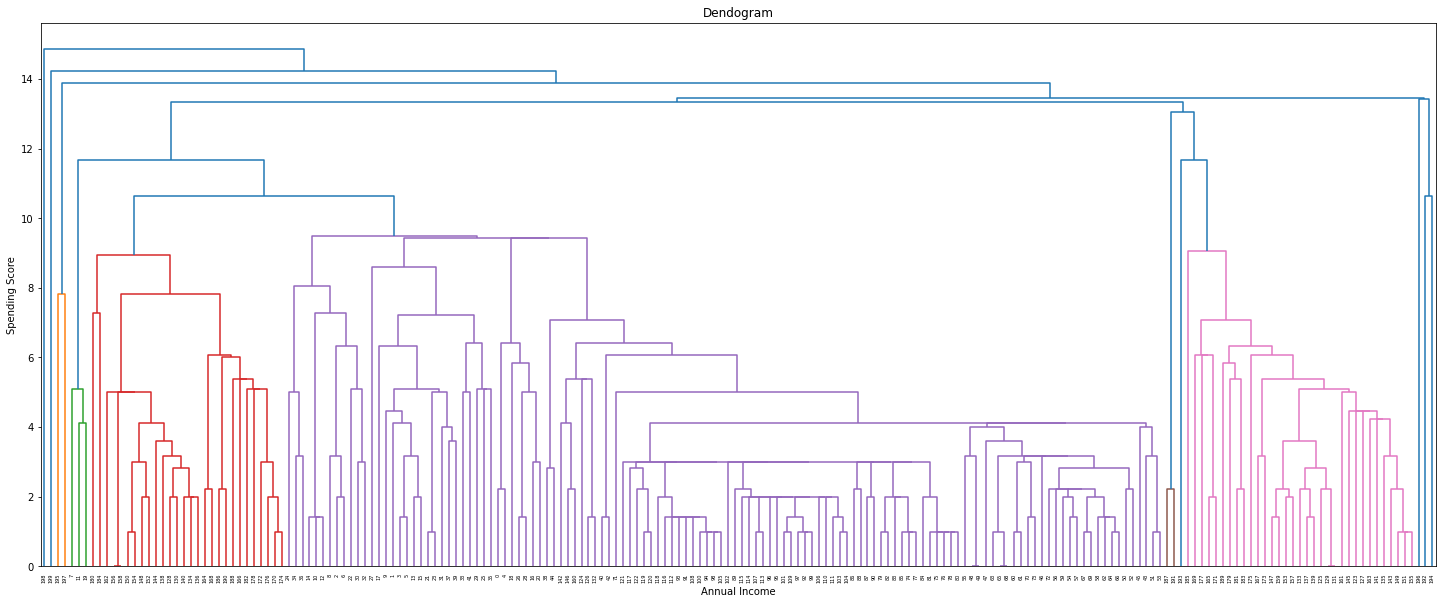

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title('Dendogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

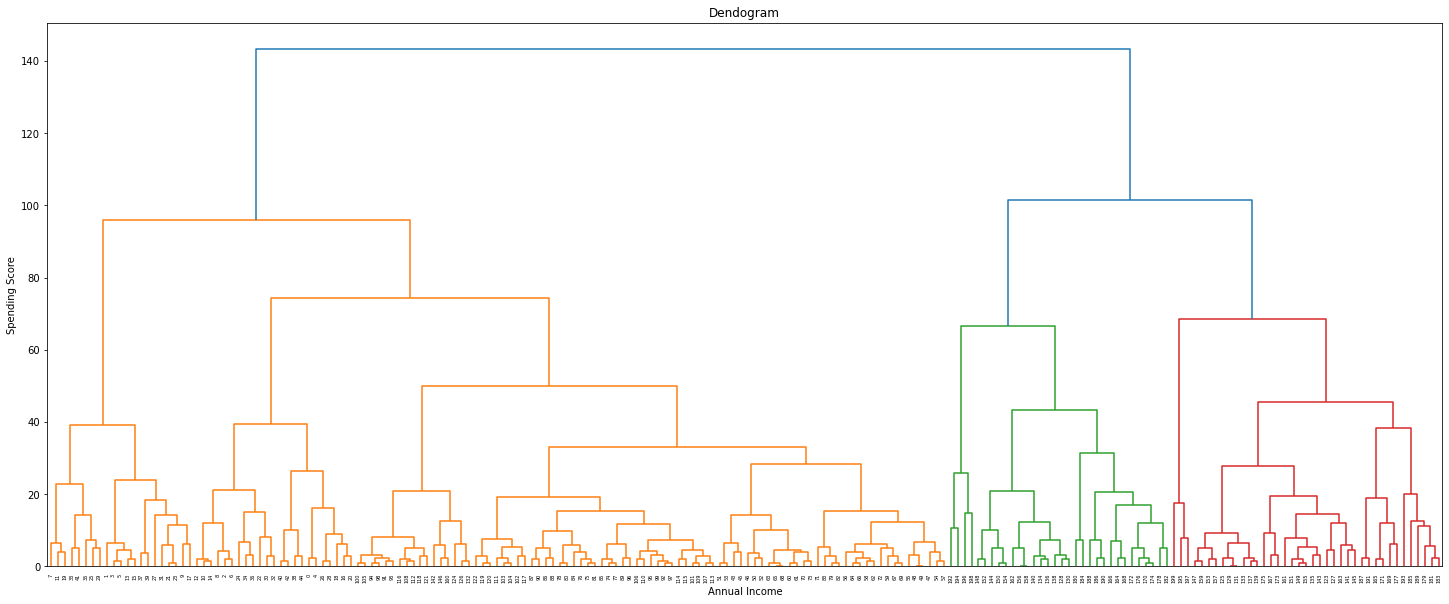

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
dendogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title('Dendogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

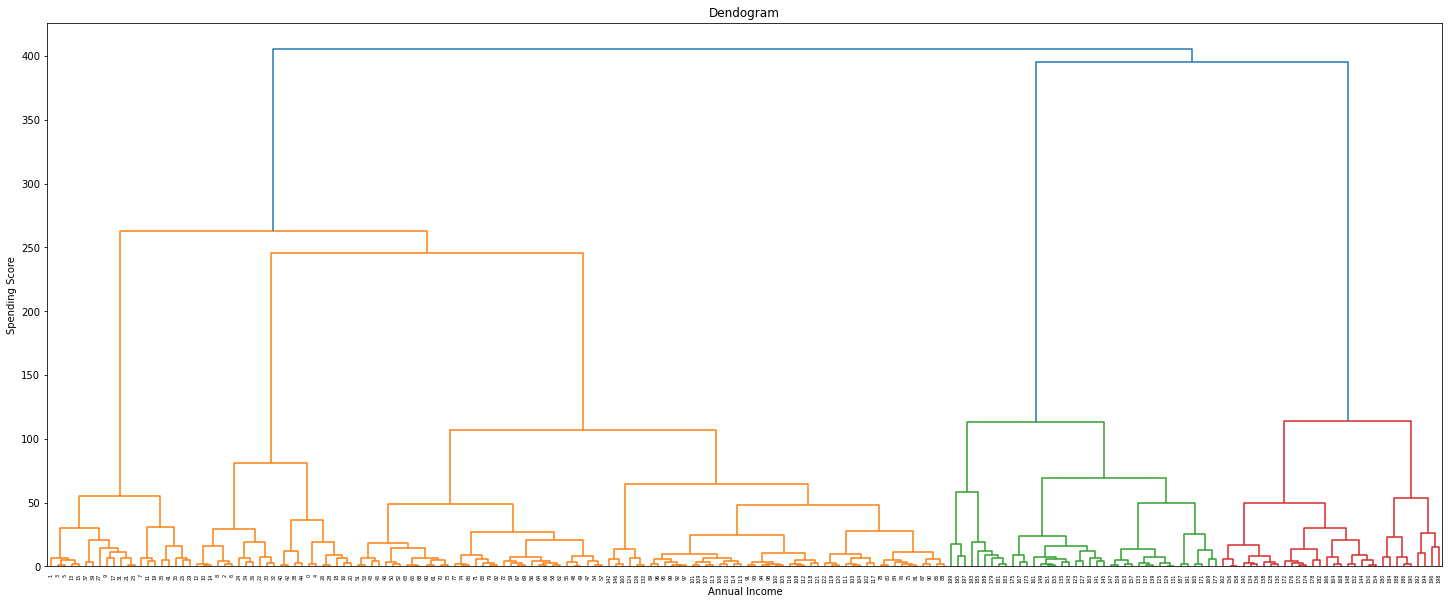

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Method-2**

In [99]:
from sklearn.cluster import AgglomerativeClustering  
import warnings
warnings.filterwarnings("ignore")
hc=AgglomerativeClustering(n_clusters=5,
                           #affinity='euclidean', # shift+tab write the correct one
                           metric='euclidean',
                           linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

# Those who are getting error affinity
# metric='euclidean'

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [100]:
y_clusters # kmeans cluster

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4,
       0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

- k-means ======= > 1 sample , 3rd sample ======= > 0
- hch =========== > 1 sample , 3rd sample ======= > 4

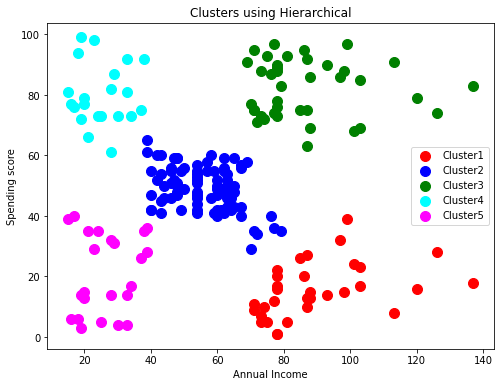

In [101]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(8,6))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label="Cluster5")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using Hierarchical")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [102]:
# Compute the overall silhouette score
silhouette_avg_hierarchical = silhouette_score(X, y_hc)
print(f"Hierarchical Clustering Silhouette Score: {round(silhouette_avg_hierarchical,4)}")

Hierarchical Clustering Silhouette Score: 0.553


In [103]:
if silhouette_avg > silhouette_avg_hierarchical:
    print("K-Means performs better based on the Silhouette Score.")
else:
    print("Hierarchical Clustering performs better based on the Silhouette Score.")

K-Means performs better based on the Silhouette Score.
